# Leer Archivos XY exportados de SPECSLAB Prodigy

In [1]:
# --- OS ----------------------------------------------------------------------
import os 
# for details see https://thomas-cokelaer.info/tutorials/python/module_os.html

# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- Numpy -------------------------------------------------------------------
import numpy as np

# --- Pandas ------------------------------------------------------------------
#import pandas as pd

# --- LMFIT -------------------------------------------------------------------
from lmfit import Parameters, minimize, report_fit
from lmfit.models import ConstantModel, GaussianModel, LinearModel, VoigtModel
from lmfit import CompositeModel, Model

# --- scipy -------------------------------------------------------------------
from scipy.special import wofz


# --- Our own modules ---------------------------------------------------------
import sys
sys.path.insert(0, '/home/julio/Python/XPS_Python/paquetes_funciones/') # Julio Laptop
#sys.path.insert(0, '/Users/ceciliapatrault/Desktop/Julio/XPS_PYTHON/paquetes_funciones') # Mac
import specs_xy as sp
import fitxps as fitxps
#from fitxps import *
import xpspy as xpspy

In [2]:
files_path = "data/separated/"

archivos = sp.list_files_xy(files_path)

print(archivos)

data/separated/
['data/separated/Au_MeMBA_5min_10_Survey (0).xy', 'data/separated/Au_MeMBA_5min_11_S (0).xy', 'data/separated/Au_MeMBA_5min_12_C (0).xy', 'data/separated/Au_MeMBA_5min_13_Au (0).xy', 'data/separated/Au_MeMBA_5min_14_VB (0).xy', 'data/separated/Au_MeMBA_5min_15_O (0).xy', 'data/separated/Au_MeMBA_5min_16_S (1).xy', 'data/separated/Au_MeMBA_5min_17_C (1).xy', 'data/separated/Au_MeMBA_5min_18_Au (1).xy', 'data/separated/Au_MeMBA_5min_19_VB (1).xy', 'data/separated/Au_MeMBA_5min_20_O (1).xy', 'data/separated/Au_MeMBA_5min_21_S (2).xy', 'data/separated/Au_MeMBA_5min_22_C (2).xy', 'data/separated/Au_MeMBA_5min_23_Au (2).xy', 'data/separated/Au_MeMBA_5min_24_VB (2).xy', 'data/separated/Au_MeMBA_5min_25_O (2).xy', 'data/separated/Au_MeMBA_5min_26_S (3).xy', 'data/separated/Au_MeMBA_5min_27_C (3).xy', 'data/separated/Au_MeMBA_5min_28_Au (3).xy', 'data/separated/Au_MeMBA_5min_29_VB (3).xy', 'data/separated/Au_MeMBA_5min_30_O (3).xy', 'data/separated/Au_MeMBA_5min_31_Spectrum.xy']

In [3]:
S_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_11_S (0).xy')
survey = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_10_Survey (0).xy')
VB_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_14_VB (0).xy')
Au_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_13_Au (0).xy')

In [4]:
S_0

{'details': {'Region': 'S (0)',
  'Acquisition Date': '06/10/22 18:06:02 UTC',
  'Analysis Method': 'XPS',
  'Analyzer Lens': 'MediumArea:3.5kV',
  'Analyzer Slit': '5:7x20\\B:open',
  'Scan Mode': 'FixedAnalyzerTransmission',
  'Curves/Scan': 1,
  'Values/Curve': 181,
  'Dwell Time': 0.1,
  'Excitation Energy': 1486.71,
  'Binding Energy': 168.0,
  'Pass Energy': 20.0,
  'Bias Voltage': 90.0,
  'Detector Voltage': 1750.0,
  'Eff. Workfunction': 4.341,
  'Source': 'Focus',
  'Comment': 'sin irradiar',
  'Number of Scans': 30},
 'data_orig': {'BE': array([-168.  , -167.95, -167.9 , -167.85, -167.8 , -167.75, -167.7 ,
         -167.65, -167.6 , -167.55, -167.5 , -167.45, -167.4 , -167.35,
         -167.3 , -167.25, -167.2 , -167.15, -167.1 , -167.05, -167.  ,
         -166.95, -166.9 , -166.85, -166.8 , -166.75, -166.7 , -166.65,
         -166.6 , -166.55, -166.5 , -166.45, -166.4 , -166.35, -166.3 ,
         -166.25, -166.2 , -166.15, -166.1 , -166.05, -166.  , -165.95,
         -165.9 

## Valence Band and Fermi Edge
How to explore Valence Band and fit the Fermi Level to be used as energy shift correction.

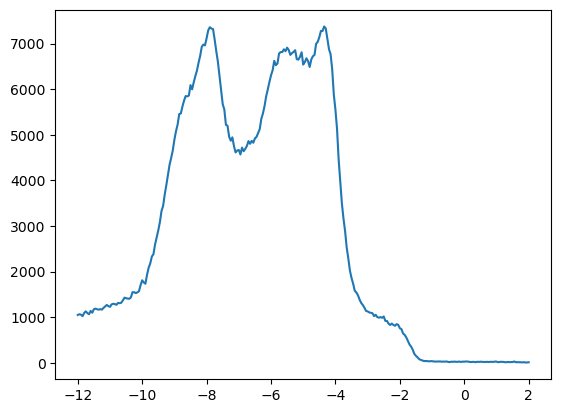

In [5]:
plt.plot(VB_0['data_orig']['BE'],VB_0['data_orig']['intensity'])

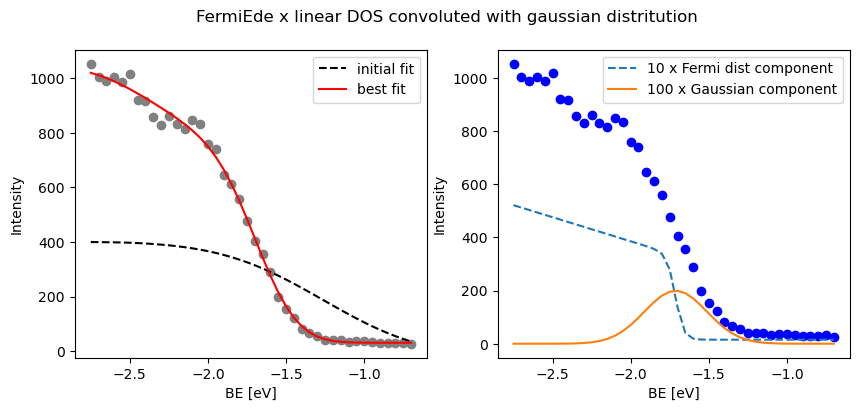

[[Model]]
    (Model(FL_LDOS, prefix='FL_') <function convolve at 0x7f021d9d9ea0> Model(gaussian_normalized, prefix='g_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 104
    # data points      = 42
    # variables        = 5
    chi-square         = 19847.7802
    reduced chi-square = 536.426491
    Akaike info crit   = 268.643469
    Bayesian info crit = 277.331817
[[Variables]]
    FL_m:      -18.1285723 +/- 1.79912212 (9.92%) (init = -1)
    FL_b:       31.8156472 +/- 1.65997616 (5.22%) (init = 20)
    FL_c:       1.51990276 +/- 0.34167743 (22.48%) (init = 0)
    FL_center: -1.71188558 +/- 0.00717612 (0.42%) (init = -1.5)
    FL_T:       300 (fixed)
    g_center:  -1.71188558 +/- 0.00717612 (0.42%) == 'FL_center'
    g_gw:       0.20000000 +/- 0.02374309 (11.87%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(FL_m, FL_b)      = 0.947
    C(FL_b, FL_center) = -0.825
    C(FL_m, FL_center) = -0.801
    C(FL_b, g_gw)      = -

In [6]:
fitxps.FermiEdge(VB_0,'BE',-2.8,-0.7,0,20,-1,300,0.5,-1.5)

Fermi Level at: -1.6842553841088832


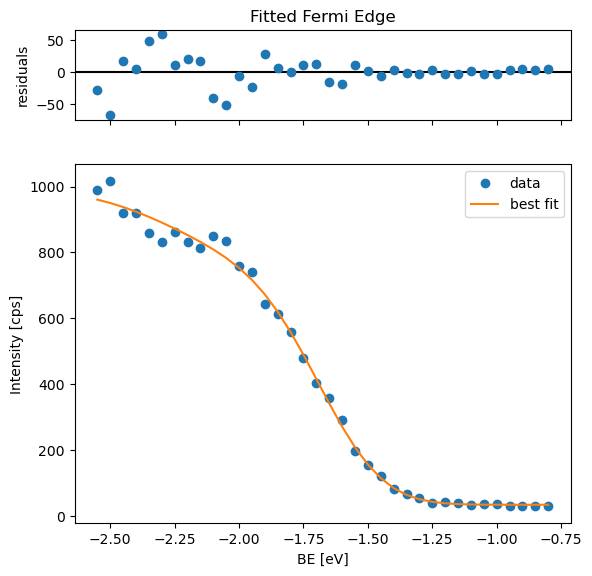

In [7]:
fitxps.FermiEdge_gn(VB_0,'BE',-2.6,-0.8,0,20,-1,300,0.5,-1.7)

In [8]:
VB_0['results']

In [9]:
VB_0['results'].best_values['FL_center']

-1.6842553841088832

## Au 4f
Fitting Au 4f doublet with Doniach-Sunjic functions. The BE value for Au 4f$_{7/2}$ as a second reference (than FL).

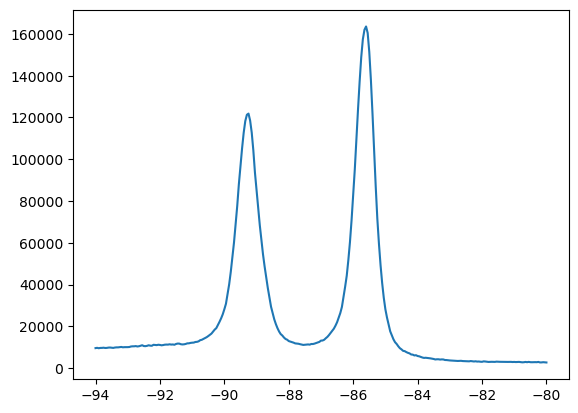

In [10]:
plt.plot(Au_0['data_orig']['BE'],Au_0['data_orig']['intensity'])

[[Model]]
    (Model(linear, prefix='bkgl_') + Model(doublet_nf, prefix='pDS_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 178
    # variables        = 6
    chi-square         = 1.0043e+09
    reduced chi-square = 5839120.88
    Akaike info crit   = 2779.15271
    Bayesian info crit = 2798.24341
[[Variables]]
    bkgl_slope:     -556.512729 +/- 71.0263172 (12.76%) (init = 1)
    bkgl_intercept: -44927.7317 +/- 6232.00992 (13.87%) (init = 1000)
    pDS_sos:         3.63583815 +/- 0.00369273 (0.10%) (init = 3.65)
    pDS_intercept:   0 (fixed)
    pDS_slope:       0 (fixed)
    pDS_lw:          0.317 (fixed)
    pDS_asym:        0.054 (fixed)
    pDS_gw:          0.52147623 +/- 0.00571723 (1.10%) (init = 0.5)
    pDS_int:         273288.759 +/- 1560.99362 (0.57%) (init = 100000)
    pDS_e:          -85.6090681 +/- 0.00222502 (0.00%) (init = -85.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(bkgl_slope, bkgl_

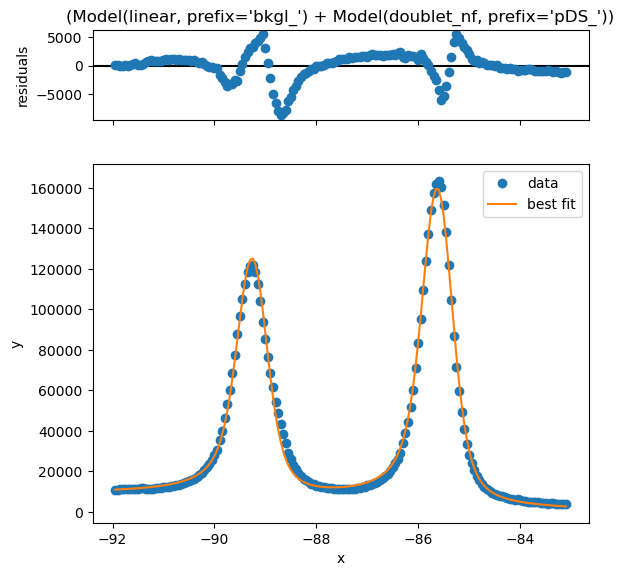

In [11]:
region = Au_0

energy_scale = 'BE'
xmin = -92
xmax = -83

sos = 3.65

# create data from broadened step
x_full = region['data_orig'][energy_scale]
y_full = region['data_orig']['intensity']

# range of data to be fitted

index_xmin = np.min(np.where(x_full > xmin))
index_xmax = np.max(np.where(x_full < xmax))

x = x_full[index_xmin:index_xmax]
y = y_full[index_xmin:index_xmax]

bkgl = LinearModel(independent_vars=['x'], prefix='bkgl_')

pDS = Model(fitxps.doublet_nf, independent_vars=['x'], prefix='pDS_')

mod = bkgl + pDS

pars = mod.make_params()

# parameters

pars['bkgl_intercept'].set(value=1000)
pars['bkgl_slope'].set(value=1)

# sos=3.65,bg0=0.,bg1=0.,l=0.317,a=0.054,g=0.5,i=100000,e=-85.3
pars['pDS_sos'].set(value=3.65, vary=True)
pars['pDS_intercept'].set(value=0, vary=False)
pars['pDS_slope'].set(value=0, vary=False)
pars['pDS_lw'].set(value=0.317, vary=False)
pars['pDS_asym'].set(value=0.054, vary=False)
pars['pDS_gw'].set(value=0.5, min=0.3, max=1.1)
pars['pDS_int'].set(value=100000, min=0)
pars['pDS_e'].set(value=-85.3)

# fit this model to data array y
result = mod.fit(y, params=pars, x=x)

result.plot()

print(result.fit_report())


[[Model]]
    (Model(linear, prefix='bkgl_') + Model(doublet_nf_r, prefix='pDS_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 178
    # variables        = 6
    chi-square         = 1.0812e+09
    reduced chi-square = 6285923.50
    Akaike info crit   = 2792.27710
    Bayesian info crit = 2811.36780
[[Variables]]
    bkgl_slope:     -582.305288 +/- 81.1808473 (13.94%) (init = 1)
    bkgl_intercept: -47141.5689 +/- 7110.42200 (15.08%) (init = 1000)
    pDS_sos:         3.65 (fixed)
    pDS_intercept:   0 (fixed)
    pDS_slope:       0 (fixed)
    pDS_lw:          0.317 (fixed)
    pDS_asym:        0.054 (fixed)
    pDS_gw:          0.52041933 +/- 0.00592972 (1.14%) (init = 0.5)
    pDS_int:         273852.138 +/- 1810.79256 (0.66%) (init = 100000)
    pDS_e:          -85.6044057 +/- 0.00185338 (0.00%) (init = -85.3)
    pDS_r:           0.74395589 +/- 0.00661113 (0.89%) (init = 0.75)
[[Correlations]] (unreported correlations 

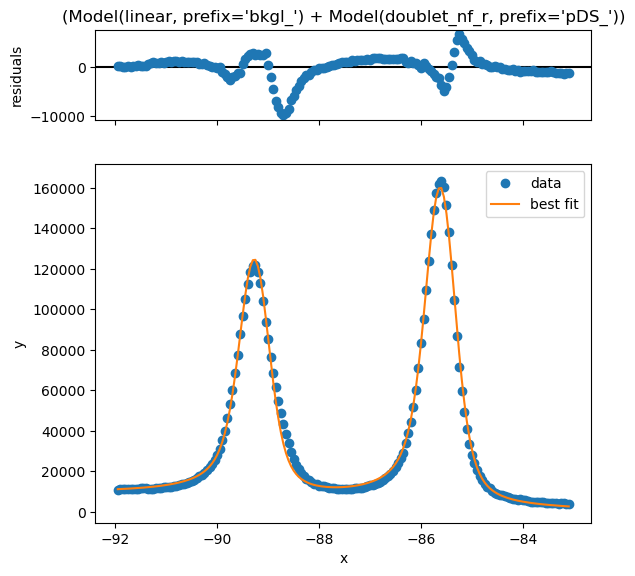

In [15]:
region = Au_0

energy_scale = 'BE'
xmin = -92
xmax = -83

sos = 3.65

# create data from broadened step
x_full = region['data_orig'][energy_scale]
y_full = region['data_orig']['intensity']

# range of data to be fitted

index_xmin = np.min(np.where(x_full > xmin))
index_xmax = np.max(np.where(x_full < xmax))

x = x_full[index_xmin:index_xmax]
y = y_full[index_xmin:index_xmax]

bkgl = LinearModel(independent_vars=['x'], prefix='bkgl_')

pDS = Model(fitxps.doublet_nf_r, independent_vars=['x'], prefix='pDS_')

mod = bkgl + pDS

pars = mod.make_params()

# parameters

pars['bkgl_intercept'].set(value=1000)
pars['bkgl_slope'].set(value=1)

# sos=3.65,bg0=0.,bg1=0.,l=0.317,a=0.054,g=0.5,i=100000,e=-85.3
pars['pDS_sos'].set(value=3.65, vary=False)
pars['pDS_intercept'].set(value=0, vary=False)
pars['pDS_slope'].set(value=0, vary=False)
pars['pDS_lw'].set(value=0.317, vary=False)
pars['pDS_asym'].set(value=0.054, vary=False)
pars['pDS_gw'].set(value=0.5, min=0.3, max=1.1)
pars['pDS_int'].set(value=100000, min=0)
pars['pDS_e'].set(value=-85.3)
pars['pDS_r'].set(value=0.75, vary=True)

# fit this model to data array y
result = mod.fit(y, params=pars, x=x)

result.plot()

print(result.fit_report())


## Correcting energy scale
The mean between FL and BE(Au4f) is taken as shift to the energy scale.

-1.6


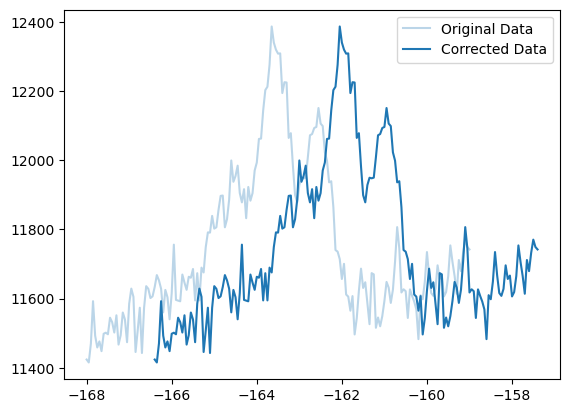

In [10]:
fitxps.Energy_Corr_one(S_0,-1.6)

## S 2p

In [11]:
# Spectra (region) to be fitted
region = S_0

# Spin-Orbital Spliting of the XP region
sos = 1.18

In [12]:
# This function define (crop) the range of data to be fitted
fitxps.range_to_fit(region, 'data_corr', 'BE',-166,-158)

In [22]:
#S_0.keys()
S_0.keys()

dict_keys(['details', 'data_orig', 'data_corr', 'data_to_fit', 'params'])

In [14]:
# Spectra (region) to be fitted
region = S_0

# Spin-Orbital Spliting of the XP region
sos = 1.18

# This function define (crop) the range of data to be fitted
fitxps.range_to_fit(region, 'data_corr', 'BE',-167,-157)

# This function define the type of background for fitting
fitxps.linear_background(region)


<lmfit.Model: Model(linear, prefix='bkgl_')>

In [24]:
S_0['params']

name,value,initial value,min,max,vary
bkgl_slope,28.5232686,28.523268571428446,-inf,inf,True
bkgl_intercept,16222.4150,16222.41496342855,-inf,inf,True


In [15]:
def peaks

NameError: name 'pS1' is not defined

In [19]:
C_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_12_C (0).xy')

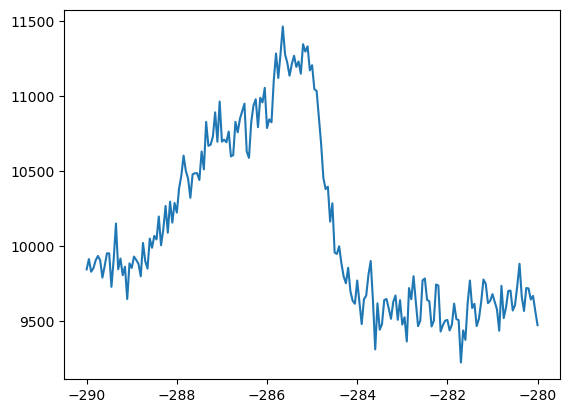

In [21]:
plt.plot(C_0['data_orig']['BE'],C_0['data_orig']['intensity'])